In [1]:
%matplotlib inline

In [2]:
import os
import pandas as pd
from zipline.data import bundles
from zipline.data.data_portal import DataPortal
from zipline.utils.calendars import get_calendar
from zipline.assets._assets import Future
from zipline.utils.run_algo import load_extensions

# Load extensions.py; this allows you access to custom bundles
load_extensions(
    default=True,
    extensions=[],
    strict=True,
    environ=os.environ,
)

# Set-Up Pricing Data Access
trading_calendar = get_calendar('NYSE')


bundle = 'futures'
bundle_data = bundles.load(bundle)
data = DataPortal(
    bundle_data.asset_finder,
    trading_calendar=trading_calendar,
    first_trading_day=bundle_data.equity_daily_bar_reader.first_trading_day,
    equity_minute_reader=None,
    equity_daily_reader=bundle_data.equity_daily_bar_reader,
    future_daily_reader=bundle_data.equity_daily_bar_reader,
    adjustment_reader=bundle_data.adjustment_reader,
)

fut = bundle_data.asset_finder.retrieve_futures_contracts([0])[0]

end_dt = pd.Timestamp('2018-01-05', tz='UTC', offset='C')
start_dt = pd.Timestamp('2018-01-02', tz='UTC', offset='C')
    
end_loc = trading_calendar.closes.index.get_loc(end_dt)

C:\Users\tomek\zipline\bundles\extension.py:13: UserWarning: Overwriting bundle with name 'futures'
  end_session=end_session,


InvalidCalendarName: The requested TradingCalendar, XNYS, does not exist.

In [3]:
from utils import future, continuous_future, history, bundle_data

InvalidCalendarName: The requested TradingCalendar, XNYS, does not exist.

In [ ]:
continuous_future = bundle_data.asset_finder.create_continuous_future
history = data.get_history_window
symbol = 'CL'

continuous_cl = continuous_future(symbol, offset=0, roll_style='volume', adjustment=None)

cl_contracts = [
    bundle_data.asset_finder.lookup_future_symbol(x) 
    for x
    in ['{}{}{}'.format(symbol, l, y) for l in 'FGHJKMNQUVXZ' for y in ['16',]] #'2017'] ]
]

cl_contracts.append(continuous_cl)

start_dt = pd.Timestamp('2015-10-21', tz='UTC', offset='C')
end_dt = pd.Timestamp('2016-06-01', tz='UTC', offset='C')

end_loc = trading_calendar.closes.index.get_loc(end_dt)
start_loc = trading_calendar.closes.index.get_loc(start_dt)    
    
cl_consecutive_contract_volume = history(
    assets=cl_contracts,
    end_dt=end_dt,
    bar_count=end_loc - start_loc,
    frequency='1d',
    field='volume',
    data_frequency='daily'
)

cl_consecutive_contract_volume.plot(figsize=(20,12), style={continuous_cl: 'k--'});

In [5]:
cl_consecutive_contract_volume['2016-03-01':'2016-03-31']

,Future(15880 [CLF16]),Future(16128 [CLG16]),Future(16366 [CLH16]),Future(16728 [CLJ16]),Future(16964 [CLK16]),Future(17229 [CLM16]),Future(17499 [CLN16]),Future(17745 [CLQ16]),Future(18001 [CLU16]),Future(18277 [CLV16]),Future(18518 [CLX16]),Future(18755 [CLZ16]),"ContinuousFuture(90999980378030080 [CL, 0, volume, None])"
2016-03-01 00:00:00+00:00,0.0,0.0,0.0,559124.0,173183.0,107256.0,36425.0,24817.0,29612.0,10769.0,6923.0,49527.0,559124.0
2016-03-02 00:00:00+00:00,0.0,0.0,0.0,592382.0,177360.0,97096.0,31754.0,19728.0,31802.0,10297.0,6313.0,49092.0,592382.0
2016-03-03 00:00:00+00:00,0.0,0.0,0.0,506313.0,167236.0,116576.0,45234.0,30043.0,28302.0,12158.0,9238.0,56907.0,506313.0
2016-03-04 00:00:00+00:00,0.0,0.0,0.0,565803.0,150028.0,91353.0,29953.0,15578.0,19112.0,6589.0,6395.0,57988.0,565803.0
2016-03-07 00:00:00+00:00,0.0,0.0,0.0,745455.0,317049.0,106399.0,41856.0,26359.0,36360.0,13273.0,11481.0,76915.0,745455.0
2016-03-08 00:00:00+00:00,0.0,0.0,0.0,740152.0,313021.0,103926.0,33850.0,22399.0,28604.0,9937.0,10209.0,62712.0,740152.0
2016-03-09 00:00:00+00:00,0.0,0.0,0.0,702916.0,295267.0,120899.0,40139.0,24633.0,31330.0,11230.0,12906.0,54573.0,702916.0
2016-03-10 00:00:00+00:00,0.0,0.0,0.0,667739.0,283890.0,124081.0,50975.0,34366.0,38320.0,12055.0,10967.0,57169.0,667739.0
2016-03-11 00:00:00+00:00,0.0,0.0,0.0,559514.0,252007.0,113255.0,49643.0,30647.0,32737.0,9751.0,11630.0,53248.0,559514.0
2016-03-14 00:00:00+00:00,0.0,0.0,0.0,480600.0,223631.0,80957.0,29346.0,19318.0,20759.0,8288.0,5971.0,39155.0,480600.0


In [6]:
es = bundle_data.asset_finder.lookup_future_symbol('ESZ18')

In [7]:
es.expiration_date

Timestamp('2018-12-21 00:00:00+0000', tz='UTC')

In [8]:
clf17_sid = bundle_data.asset_finder.lookup_future_symbol('CLF17').sid
start_dt = pd.Timestamp('2017-10-1', tz='UTC', offset='C')
cl = continuous_future('CL', offset=0, roll_style='calendar', adjustment='mul')
oc = bundle_data.asset_finder.get_ordered_contracts('CL')
chain = oc.active_chain(clf17_sid, start_dt.value)
all_chain = bundle_data.asset_finder.retrieve_all(chain)
all_chain

[Future(19064 [CLF17]),
 Future(19301 [CLG17]),
 Future(19516 [CLH17]),
 Future(19777 [CLJ17]),
 Future(20004 [CLK17]),
 Future(20235 [CLM17]),
 Future(20479 [CLN17]),
 Future(20719 [CLQ17]),
 Future(20940 [CLU17]),
 Future(21205 [CLV17]),
 Future(21456 [CLX17]),
 Future(21674 [CLZ17]),
 Future(25080 [CLF18]),
 Future(25303 [CLG18]),
 Future(25506 [CLH18]),
 Future(25748 [CLJ18]),
 Future(25954 [CLK18]),
 Future(26170 [CLM18]),
 Future(26402 [CLN18]),
 Future(26617 [CLQ18]),
 Future(26825 [CLU18]),
 Future(27057 [CLV18]),
 Future(27270 [CLX18]),
 Future(27562 [CLZ18]),
 Future(27794 [CLF19]),
 Future(28007 [CLG19]),
 Future(28187 [CLH19]),
 Future(28402 [CLJ19]),
 Future(28578 [CLK19]),
 Future(28759 [CLM19]),
 Future(28949 [CLN19]),
 Future(29139 [CLQ19]),
 Future(29308 [CLU19]),
 Future(29511 [CLV19]),
 Future(29677 [CLX19]),
 Future(29840 [CLZ19]),
 Future(30020 [CLF20]),
 Future(30183 [CLG20]),
 Future(30318 [CLH20]),
 Future(30487 [CLJ20]),
 Future(30619 [CLK20]),
 Future(30759 [C

In [9]:
all_chain[1].to_dict()

{'asset_name': 'Crude Oil Futures, February 2017 (CLG2017)',
 'auto_close_date': Timestamp('2017-01-20 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2017-01-20 00:00:00+0000', tz='UTC'),
 'exchange': 'NYMEX',
 'exchange_full': 'NYMEX',
 'expiration_date': Timestamp('2017-01-20 00:00:00+0000', tz='UTC'),
 'first_traded': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'multiplier': 1000.0,
 'notice_date': Timestamp('2017-01-18 00:00:00+0000', tz='UTC'),
 'root_symbol': 'CL',
 'sid': 19301,
 'start_date': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'symbol': 'CLG17',
 'tick_size': 0.01}

In [10]:
c = all_chain[-1]

In [11]:
c.symbol

'CLZ25'

In [12]:
cf = history(
    assets=[cl],
    end_dt=pd.Timestamp('2018-05-31'),
    bar_count=100,
    frequency='1d',
    field= 'price',
    data_frequency='daily'
)

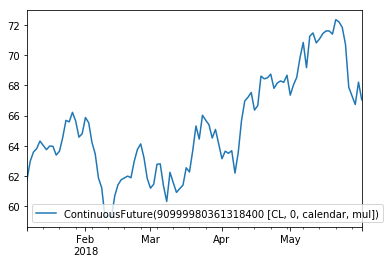

In [13]:
cf.plot()

In [14]:
cl = continuous_future('CL', offset=0, roll_style='volume', adjustment=None)

In [15]:
cl.to_dict()

{'end_date': Timestamp('2018-11-06 00:00:00+0000', tz='UTC'),
 'exchange': 'NYMEX',
 'offset': 0,
 'roll_style': 'volume',
 'root_symbol': 'CL',
 'sid': 90999980378030080,
 'start_date': Timestamp('1983-03-30 00:00:00+0000', tz='UTC')}

In [16]:
oc = bundle_data.asset_finder.get_ordered_contracts('CL')
chain = oc.active_chain(clf17_sid, start_dt.value)
all_chain = bundle_data.asset_finder.retrieve_all(chain)
all_chain

[Future(19064 [CLF17]),
 Future(19301 [CLG17]),
 Future(19516 [CLH17]),
 Future(19777 [CLJ17]),
 Future(20004 [CLK17]),
 Future(20235 [CLM17]),
 Future(20479 [CLN17]),
 Future(20719 [CLQ17]),
 Future(20940 [CLU17]),
 Future(21205 [CLV17]),
 Future(21456 [CLX17]),
 Future(21674 [CLZ17]),
 Future(25080 [CLF18]),
 Future(25303 [CLG18]),
 Future(25506 [CLH18]),
 Future(25748 [CLJ18]),
 Future(25954 [CLK18]),
 Future(26170 [CLM18]),
 Future(26402 [CLN18]),
 Future(26617 [CLQ18]),
 Future(26825 [CLU18]),
 Future(27057 [CLV18]),
 Future(27270 [CLX18]),
 Future(27562 [CLZ18]),
 Future(27794 [CLF19]),
 Future(28007 [CLG19]),
 Future(28187 [CLH19]),
 Future(28402 [CLJ19]),
 Future(28578 [CLK19]),
 Future(28759 [CLM19]),
 Future(28949 [CLN19]),
 Future(29139 [CLQ19]),
 Future(29308 [CLU19]),
 Future(29511 [CLV19]),
 Future(29677 [CLX19]),
 Future(29840 [CLZ19]),
 Future(30020 [CLF20]),
 Future(30183 [CLG20]),
 Future(30318 [CLH20]),
 Future(30487 [CLJ20]),
 Future(30619 [CLK20]),
 Future(30759 [C

In [17]:
all_chain[2].to_dict()

{'asset_name': 'Crude Oil Futures, March 2017 (CLH2017)',
 'auto_close_date': Timestamp('2017-02-21 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2017-02-21 00:00:00+0000', tz='UTC'),
 'exchange': 'NYMEX',
 'exchange_full': 'NYMEX',
 'expiration_date': Timestamp('2017-02-21 00:00:00+0000', tz='UTC'),
 'first_traded': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'multiplier': 1000.0,
 'notice_date': Timestamp('2017-02-19 00:00:00+0000', tz='UTC'),
 'root_symbol': 'CL',
 'sid': 19516,
 'start_date': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'symbol': 'CLH17',
 'tick_size': 0.01}

In [18]:
all_chain[3].to_dict()

{'asset_name': 'Crude Oil Futures, April 2017 (CLJ2017)',
 'auto_close_date': Timestamp('2017-03-21 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2017-03-21 00:00:00+0000', tz='UTC'),
 'exchange': 'NYMEX',
 'exchange_full': 'NYMEX',
 'expiration_date': Timestamp('2017-03-21 00:00:00+0000', tz='UTC'),
 'first_traded': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'multiplier': 1000.0,
 'notice_date': Timestamp('2017-03-19 00:00:00+0000', tz='UTC'),
 'root_symbol': 'CL',
 'sid': 19777,
 'start_date': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'symbol': 'CLJ17',
 'tick_size': 0.01}

In [19]:
cf = history(
    assets=[continuous_future('JY', offset=0, roll_style="volume", adjustment=None)],
    end_dt=pd.Timestamp.today(),
    bar_count=100,
    frequency='1d',
    field='sid',
    data_frequency='daily'
)

In [20]:
cf.columns=['contract']

In [21]:
contracts = cf['contract'].apply(lambda x: bundle_data.asset_finder.retrieve_asset(x))

In [22]:
contracts

2018-06-19 00:00:00+00:00    Future(27030 [JYU18])
2018-06-20 00:00:00+00:00    Future(27030 [JYU18])
2018-06-21 00:00:00+00:00    Future(27030 [JYU18])
2018-06-22 00:00:00+00:00    Future(27030 [JYU18])
2018-06-25 00:00:00+00:00    Future(27030 [JYU18])
2018-06-26 00:00:00+00:00    Future(27030 [JYU18])
2018-06-27 00:00:00+00:00    Future(27030 [JYU18])
2018-06-28 00:00:00+00:00    Future(27030 [JYU18])
2018-06-29 00:00:00+00:00    Future(27030 [JYU18])
2018-07-02 00:00:00+00:00    Future(27030 [JYU18])
2018-07-03 00:00:00+00:00    Future(27030 [JYU18])
2018-07-05 00:00:00+00:00    Future(27030 [JYU18])
2018-07-06 00:00:00+00:00    Future(27030 [JYU18])
2018-07-09 00:00:00+00:00    Future(27030 [JYU18])
2018-07-10 00:00:00+00:00    Future(27030 [JYU18])
2018-07-11 00:00:00+00:00    Future(27030 [JYU18])
2018-07-12 00:00:00+00:00    Future(27030 [JYU18])
2018-07-13 00:00:00+00:00    Future(27030 [JYU18])
2018-07-16 00:00:00+00:00    Future(27030 [JYU18])
2018-07-17 00:00:00+00:00    Fu

In [23]:
cf = history(
    assets=[cl],
    end_dt=pd.Timestamp('2018-05-31'),
    bar_count=100,
    frequency='1d',
    field='volume',
    data_frequency='daily'
)

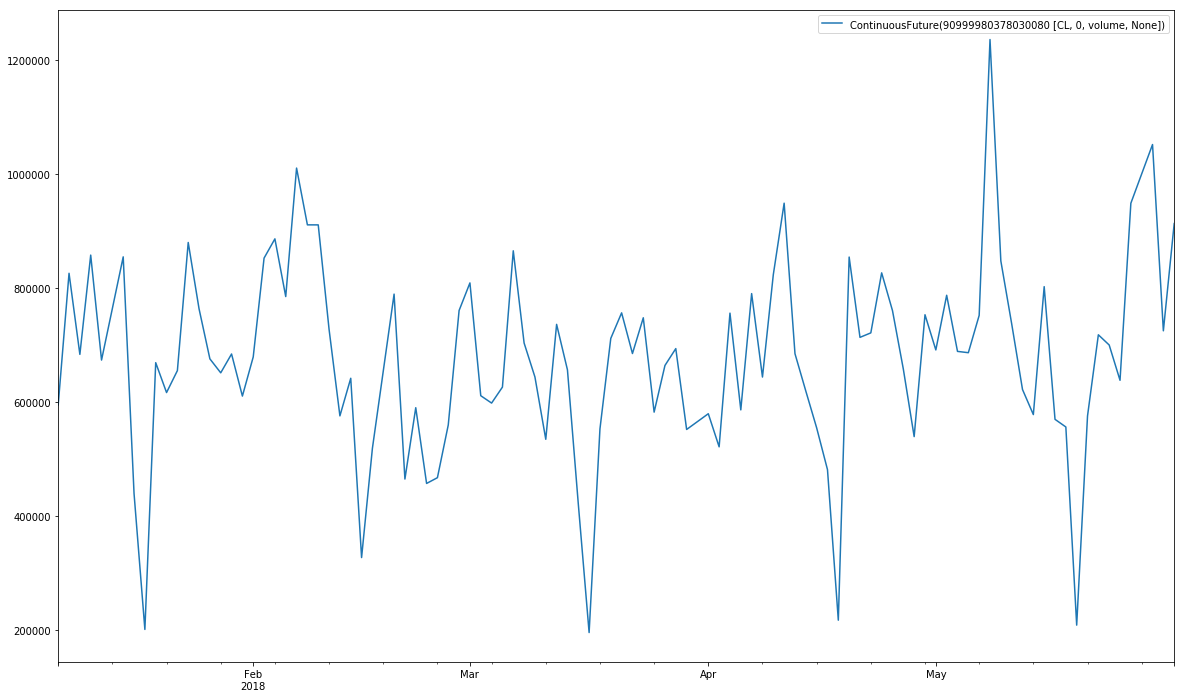

In [24]:
cf.plot(figsize=(20,12));